# Laboratory 03: Markovian Decision Process (MDP)  
Student: Espinola Rivera, Holger Elias  
Group: 5140201/20301  
Master Degree in Artificial Intelligence and Machine Learning  

### Simulation with MDP

Step 01: Settings for MDP

In [2]:
import sys, os, mdp 

# transition of probabilities
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}

# rewards
rewards = {
    's1': {'a0': {'s0': 5}},
    's2': {'a1': {'s0': -1}}
}


In [3]:
from mdp import MDP

# define graph of markovian decision process
net = MDP(transition_probs, rewards, initial_state = 's0')

# check the initial state
print("Initial state = ", net.reset())

next_state, reward, done, info = net.step('a1')
print(f"Next_state = {next_state}")
print(f"Reward = {reward}")
print(f"Done = {done}")

Initial state =  s0
Next_state = s2
Reward = 0.0
Done = False


In [4]:
# check MDP functionalities and outputs

print(" --- MDP functionalities ---")
print("All states S = ", net.get_all_states())
print("Possible actions for s1 = ", net.get_possible_actions('s1'))
print("Get next state for s1 taking action a0 = ", net.get_next_states('s1', 'a0'))
print("Get reward for transition between state s1 to s0 taking action a0 = ", 
        net.get_reward('s1', 'a0', 's0'))
print("Get transition of probability between state s1 to s0 taking action a0 = ",
        net.get_transition_prob('s1', 'a0', 's0'))


 --- MDP functionalities ---
All states S =  ('s0', 's1', 's2')
Possible actions for s1 =  ('a0', 'a1')
Get next state for s1 taking action a0 =  {'s0': 0.7, 's1': 0.1, 's2': 0.2}
Get reward for transition between state s1 to s0 taking action a0 =  5
Get transition of probability between state s1 to s0 taking action a0 =  0.7


Step 02: Graph visualization of MDP

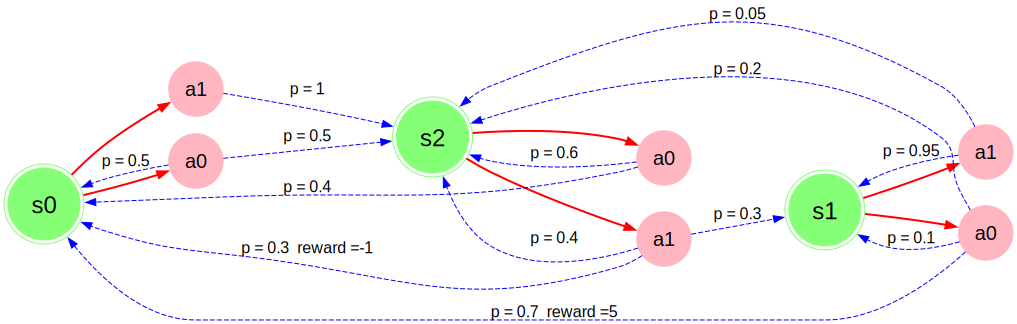

In [5]:
# graphic visualization 

from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, \
                    plot_graph_optimal_strategy_and_state_values
    display(plot_graph(net))


Step 03: Algorithm of Value Iterations (VI)  
  
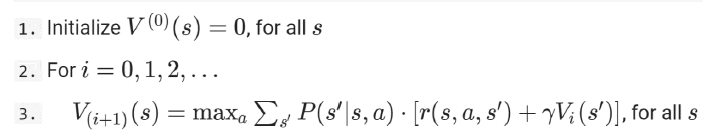

Compute function action-value Qi(s,a):  
  
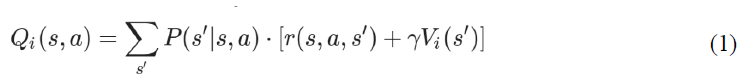

In [6]:
# calculate Q(s,a) using the next formula:
# Qi(s,a) = sum{s'}{P(s'|s,a) * [r(s,a,s') + gamma * Vi(s')]}

import numpy as np 

def get_action_value(net, state_values, state, action, gamma):
    Qi = 0
    for next_state in net.get_next_states(state, action):
        p = net.get_transition_prob(state, action, next_state)
        r = net.get_reward(state, action, next_state)
        Qi += p * (r + gamma * state_values[next_state])
    return Qi

In [7]:
# define state-values
test_Vs = {s: i for i, s in enumerate(sorted(net.get_all_states()))}
print(test_Vs)

{'s0': 0, 's1': 1, 's2': 2}


In [8]:
# test 01 - for function action-value
print(get_action_value(net, test_Vs, 's2', 'a1', 0.9))
assert np.isclose(get_action_value(net, test_Vs, 's2', 'a1', 0.9), 0.69)

0.6900000000000002


In [9]:
# test 02 - for function action-value
print(get_action_value(net, test_Vs, 's1', 'a0', 0.9))
assert np.isclose(get_action_value(net, test_Vs, 's1', 'a0', 0.9), 3.95)

3.9499999999999997


Calculate next Value-iteration using Q-value  
  
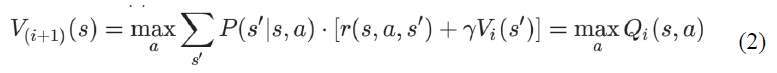

In [10]:
# calculate next_VI(s) = max Qi(s, a)
def get_new_state_value(net, state_values, state, gamma) -> float:
    if net.is_terminal(state):
        return 0
    # take the possible actions for state
    set_actions = net.get_possible_actions(state)
    next_VI = 0
    for action in set_actions:
        Qi = 0
        Qi = get_action_value(net, state_values, state, action, gamma)
        if Qi > next_VI:
            next_VI = Qi
    return next_VI


Initial state-values =  {'s0': 0, 's1': 0, 's2': 0}


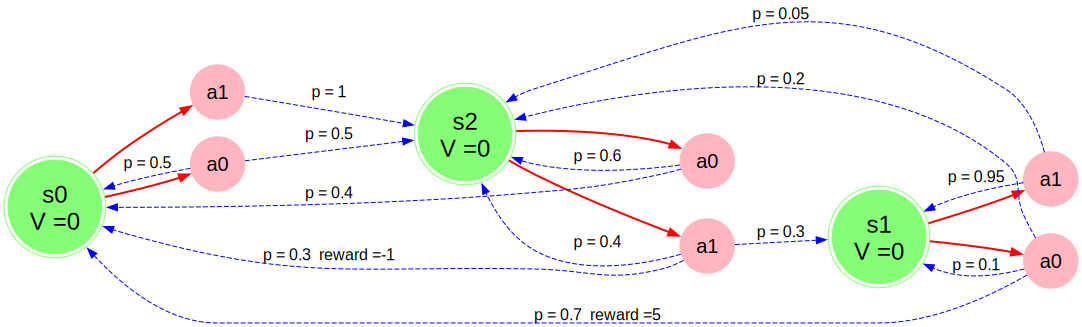

In [12]:
# initialization of markov chain settings

# parameters
gamma = 0.9
num_iter = 100

# convergence criteria
min_difference = 0.001

# initialization 
state_values = {s:0 for s in net.get_all_states()}
print("Initial state-values = ", state_values)

# graphic of markov chain
if has_graphviz:
    display(plot_graph_with_state_values(net, state_values))


In [13]:
#               --- value-iteration algorithm ---

# VI-algorithm
for i in range(num_iter):
    # calculate next_VI(s) for all states
    new_state_values = {state: get_new_state_value(net, state_values, state, gamma) for state in net.get_all_states()}
    # check if the datatype is dictionary
    assert isinstance(new_state_values, dict)
    # calculate the divergence
    diff = max(abs(new_state_values[s] - state_values[s]) for s in net.get_all_states())
    print("iter %4i | diff: %6.5f | " % (i, diff), end="")
    print(' '.join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values
    if diff < min_difference:
        print("Terminated")
        break

iter    0 | diff: 3.50000 | V(s0) = 0.000 V(s1) = 0.000 V(s2) = 0.000
iter    1 | diff: 0.64500 | V(s0) = 0.000 V(s1) = 3.500 V(s2) = 0.000
iter    2 | diff: 0.58050 | V(s0) = 0.000 V(s1) = 3.815 V(s2) = 0.645
iter    3 | diff: 0.43582 | V(s0) = 0.581 V(s1) = 3.959 V(s2) = 0.962
iter    4 | diff: 0.30634 | V(s0) = 0.866 V(s1) = 4.395 V(s2) = 1.272
iter    5 | diff: 0.27571 | V(s0) = 1.145 V(s1) = 4.670 V(s2) = 1.579
iter    6 | diff: 0.24347 | V(s0) = 1.421 V(s1) = 4.926 V(s2) = 1.838
iter    7 | diff: 0.21419 | V(s0) = 1.655 V(s1) = 5.169 V(s2) = 2.075
iter    8 | diff: 0.19277 | V(s0) = 1.868 V(s1) = 5.381 V(s2) = 2.290
iter    9 | diff: 0.17327 | V(s0) = 2.061 V(s1) = 5.573 V(s2) = 2.481
iter   10 | diff: 0.15569 | V(s0) = 2.233 V(s1) = 5.746 V(s2) = 2.654
iter   11 | diff: 0.14012 | V(s0) = 2.389 V(s1) = 5.902 V(s2) = 2.810
iter   12 | diff: 0.12610 | V(s0) = 2.529 V(s1) = 6.042 V(s2) = 2.950
iter   13 | diff: 0.11348 | V(s0) = 2.655 V(s1) = 6.168 V(s2) = 3.076
iter   14 | diff: 0.

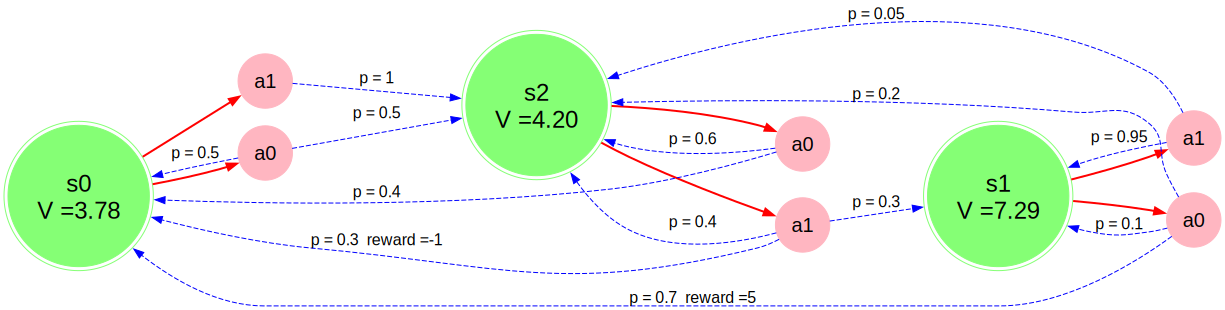

In [14]:
# check the results of state-values in markov chain
if has_graphviz:
    display(plot_graph_with_state_values(net, state_values))

In [15]:
print("Final state-values = ", state_values)
assert abs(state_values['s0'] - 3.781) < 0.01
assert abs(state_values['s1'] - 7.294) < 0.01
assert abs(state_values['s2'] - 4.202) < 0.01

Final state-values =  {'s0': 3.7810348735476405, 's1': 7.294006423867229, 's2': 4.202140275227048}


Step 04: Algorithm of Optimal actions Pi*  
Using VI* (optimal value-iteration), find optimal actions for each state Pi*  
   
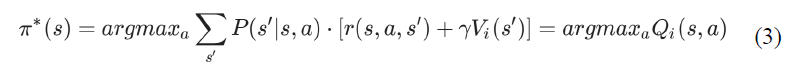

In [16]:
# take the action corresponded to argmax taking in account the formula:
# pi*(s) = argmax_{a}{(Q(s, a))} 
def get_optimal_action(net, state_values, state, gamma=0.9):
    if net.is_terminal(state):
        return None
    # take the set of actions
    set_actions = net.get_possible_actions(state)

    # check by each action, the argmax of Qi
    vect_action_values = []
    for action in set_actions:
        Q_value = get_action_value(net, state_values, state, action, gamma)
        vect_action_values.append(Q_value)
    
    # take the argmax of vect_action_values
    pi_index = np.argmax(vect_action_values)
    pi_star = set_actions[pi_index]

    return pi_star


In [17]:
# final results
print("Final state-values V(s) = ", state_values)
assert(get_optimal_action(net, state_values, 's0', gamma) == 'a1')
assert(get_optimal_action(net, state_values, 's1', gamma) == 'a0')
assert(get_optimal_action(net, state_values, 's2', gamma) == 'a1')

Final state-values V(s) =  {'s0': 3.7810348735476405, 's1': 7.294006423867229, 's2': 4.202140275227048}


In [18]:
# test 01 - optimal action pi*
print(get_optimal_action(net, {'s0': -1e10, 's1': 0, 's2': -2e10}, 's0', 0.9))
assert(get_optimal_action(net, {'s0': -1e10, 's1': 0, 's2': -2e10}, 's0', 0.9) == 'a0')

a0


In [19]:
# test 02 - optimal action pi*
print(get_optimal_action(net, {'s0': -2e10, 's1': 0, 's2': -1e10}, 's0', 0.9))
assert(get_optimal_action(net, {'s0': -2e10, 's1': 0, 's2': -1e10}, 's0', 0.9) == 'a1')

a1


Step 05: Calculate average reward

In [21]:
s = net.reset()
rewards = []

# iterate and calculate the math-expectation of reward
for _ in range(10000):
    s, r, done, _ = net.step(get_optimal_action(net, state_values, s, gamma))
    rewards.append(r)

# check the final results of average reward
print("Average reward = ", np.mean(rewards))
assert(0.40 < np.mean(rewards) < 0.55)

Average reward =  0.4842


### Simulation with Frozen Lake Environment

In [22]:
# check the frozen lake environment
from mdp import FrozenLakeEnv

env = FrozenLakeEnv(slip_chance = 0)
env.render()

*FFF
FHFH
FFFH
HFFG



Step 01: Value-iteration algorithm

In [23]:
# check all states
env.get_all_states()

((0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3))

In [24]:
# initial state
env._initial_state

(0, 0)

In [25]:
# Value-iteration algorithm
def value_iteration(env, state_values = None, gamma = 0.9, num_iter = 1000, min_difference = 1e-5):
    # each state is coordinate in 4 x 4 table
    state_values = state_values or {s:0 for s in env.get_all_states()}

    for i in range(num_iter):
        # calculate new-state-values using Value-iteration algorithm
        new_state_values = {state: get_new_state_value(env, state_values, state, gamma) for state in state_values}
        assert isinstance(new_state_values, dict)
        
        # calculate the divergence
        diff = max(abs(new_state_values[s] - state_values[s]) for s in env.get_all_states())
        print("iter %4i | diff: %6.5f | V(start): %.3f " % (i, diff, new_state_values[env._initial_state]))
        state_values = new_state_values

        if diff < min_difference:
            break

    return state_values

In [26]:
# calculate state-values V(s)
state_values = value_iteration(env)

# define the state
s = env.reset()

# initial states
print("begin")
env.render()

# take the optimal action
for t in range(100):
    a = get_optimal_action(env, state_values, s, gamma)
    print(a, end = '\n \n')
    s, r, done, _ = env.step(a)
    env.render()

    if done:
        break

iter    0 | diff: 1.00000 | V(start): 0.000 
iter    1 | diff: 0.90000 | V(start): 0.000 
iter    2 | diff: 0.81000 | V(start): 0.000 
iter    3 | diff: 0.72900 | V(start): 0.000 
iter    4 | diff: 0.65610 | V(start): 0.000 
iter    5 | diff: 0.59049 | V(start): 0.590 
iter    6 | diff: 0.00000 | V(start): 0.590 
begin
*FFF
FHFH
FFFH
HFFG

down
 
SFFF
*HFH
FFFH
HFFG

down
 
SFFF
FHFH
*FFH
HFFG

right
 
SFFF
FHFH
F*FH
HFFG

down
 
SFFF
FHFH
FFFH
H*FG

right
 
SFFF
FHFH
FFFH
HF*G

right
 
SFFF
FHFH
FFFH
HFF*



Step 02: Visualization of policy

In [44]:
import matplotlib.pyplot as plt 

# visualize policy
def draw_policy(mdp, state_values): 
    plt.figure(figsize=(3, 3)) 
    h, w = mdp.desc.shape 
    states = sorted(mdp.get_all_states())
    V = np.array([state_values[s] for s in states]) 
    Pi = {s: get_optimal_action(mdp, state_values, s, gamma) for s in states} 
    plt.imshow(V.reshape(w, h), cmap='gray', interpolation='none', clim=(0, 1)) 
    ax = plt.gca() 
    ax.set_xticks(np.arange(h)-.5) 
    ax.set_yticks(np.arange(w)-.5) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([]) 
    Y, X = np.mgrid[0:4, 0:4] 
    a2uv = {'left': (-1, 0), 'down': (0, -1), 'right': (1, 0), 'up': (0, 1)} 
    for y in range(h): 
        for x in range(w): 
            plt.text(x, y, str(mdp.desc[y, x].item()), color='g', size=12, verticalalignment='center', 
                     horizontalalignment='center', fontweight='bold') 
            a = Pi[y, x] 
            if a is None:
                continue
            u, v = a2uv[a] 
            plt.arrow(x, y, u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1)
    plt.grid(color='b', lw=2, ls='-') 
    plt.show()


Environment 4 x 4

after iteration 0
iter    0 | diff: 1.00000 | V(start): 0.000 


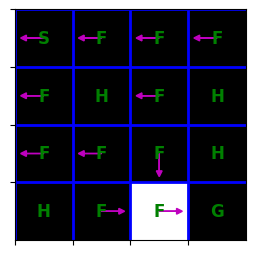

after iteration 1
iter    0 | diff: 0.90000 | V(start): 0.000 


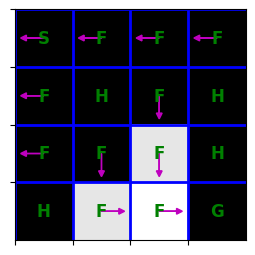

after iteration 2
iter    0 | diff: 0.81000 | V(start): 0.000 


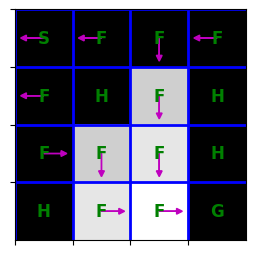

after iteration 3
iter    0 | diff: 0.72900 | V(start): 0.000 


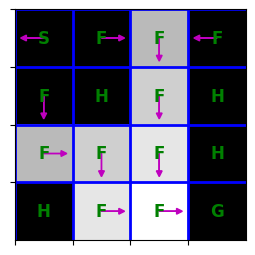

after iteration 4
iter    0 | diff: 0.65610 | V(start): 0.000 


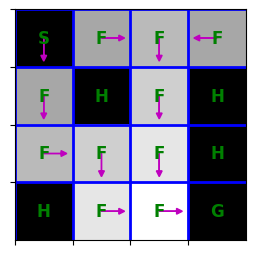

after iteration 5
iter    0 | diff: 0.59049 | V(start): 0.590 


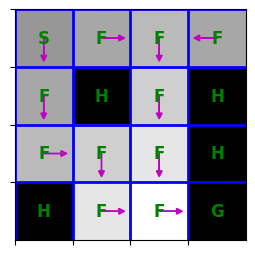

after iteration 6
iter    0 | diff: 0.00000 | V(start): 0.590 


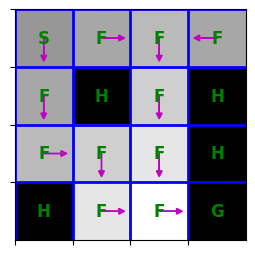

after iteration 7
iter    0 | diff: 0.00000 | V(start): 0.590 


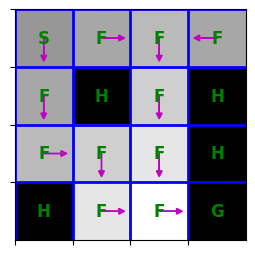

after iteration 8
iter    0 | diff: 0.00000 | V(start): 0.590 


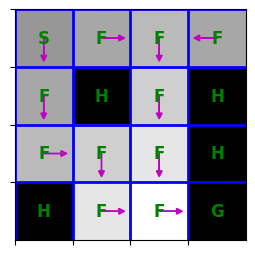

after iteration 9
iter    0 | diff: 0.00000 | V(start): 0.590 


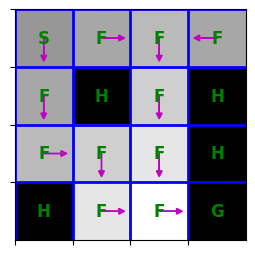

In [45]:
state_values = {s: 0 for s in env.get_all_states()} 
for i in range(10): 
    print("after iteration %i" % i) 
    state_values = value_iteration(env, state_values, num_iter=1) 
    draw_policy(env, state_values)

Environment 8 x 8 

after iteration 0
iter    0 | diff: 0.90000 | V(start): 0.000 


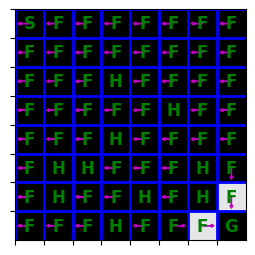

after iteration 1
iter    0 | diff: 0.72900 | V(start): 0.000 


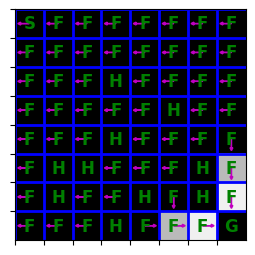

after iteration 2
iter    0 | diff: 0.59049 | V(start): 0.000 


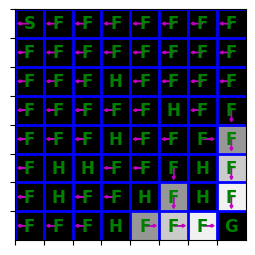

after iteration 3
iter    0 | diff: 0.47830 | V(start): 0.000 


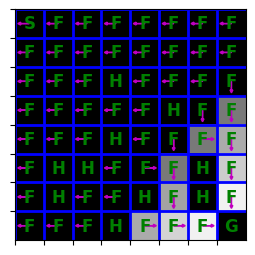

after iteration 4
iter    0 | diff: 0.40894 | V(start): 0.000 


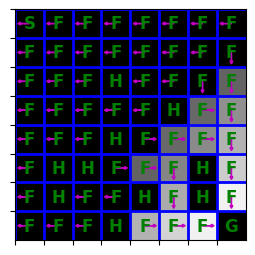

after iteration 5
iter    0 | diff: 0.34868 | V(start): 0.000 


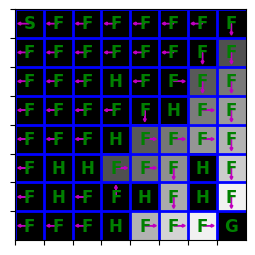

after iteration 6
iter    0 | diff: 0.29655 | V(start): 0.000 


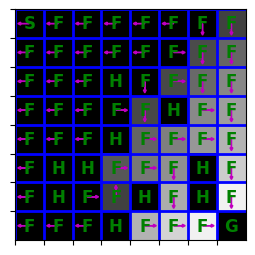

after iteration 7
iter    0 | diff: 0.25292 | V(start): 0.000 


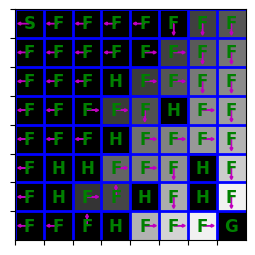

after iteration 8
iter    0 | diff: 0.21619 | V(start): 0.000 


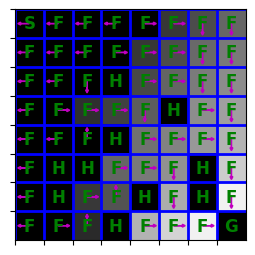

after iteration 9
iter    0 | diff: 0.18482 | V(start): 0.000 


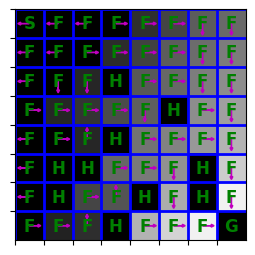

after iteration 10
iter    0 | diff: 0.15757 | V(start): 0.000 


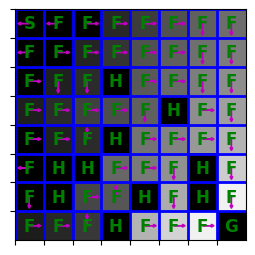

after iteration 11
iter    0 | diff: 0.13430 | V(start): 0.000 


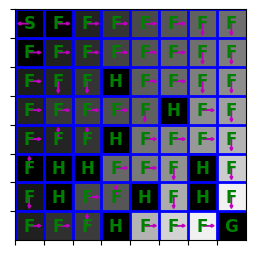

after iteration 12
iter    0 | diff: 0.11445 | V(start): 0.000 


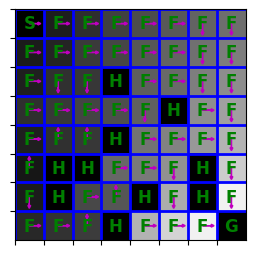

after iteration 13
iter    0 | diff: 0.09751 | V(start): 0.098 


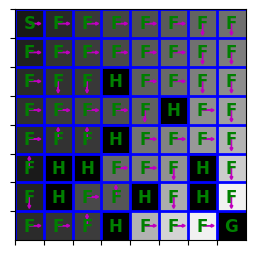

after iteration 14
iter    0 | diff: 0.04772 | V(start): 0.139 


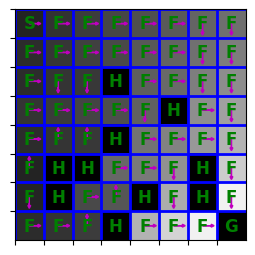

after iteration 15
iter    0 | diff: 0.03479 | V(start): 0.173 


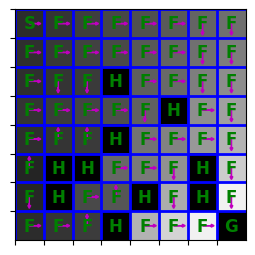

after iteration 16
iter    0 | diff: 0.01283 | V(start): 0.186 


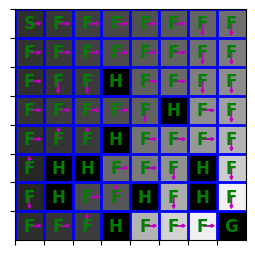

after iteration 17
iter    0 | diff: 0.00734 | V(start): 0.194 


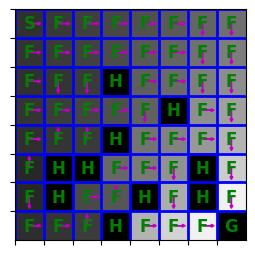

after iteration 18
iter    0 | diff: 0.00255 | V(start): 0.196 


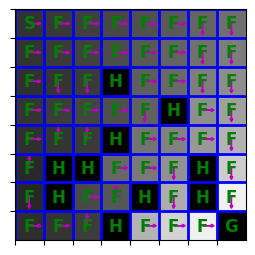

after iteration 19
iter    0 | diff: 0.00125 | V(start): 0.197 


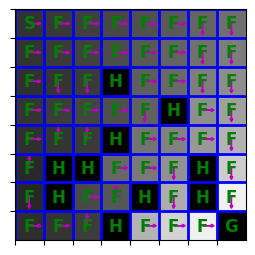

after iteration 20
iter    0 | diff: 0.00042 | V(start): 0.198 


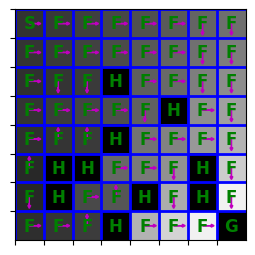

after iteration 21
iter    0 | diff: 0.00019 | V(start): 0.198 


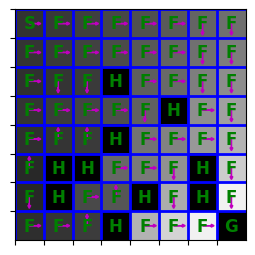

after iteration 22
iter    0 | diff: 0.00006 | V(start): 0.198 


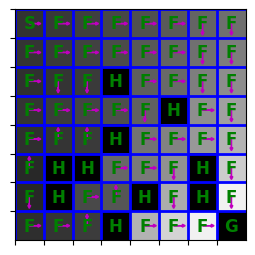

after iteration 23
iter    0 | diff: 0.00003 | V(start): 0.198 


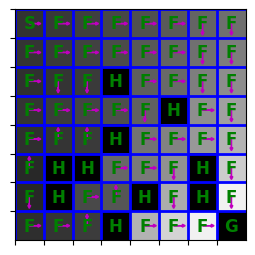

after iteration 24
iter    0 | diff: 0.00001 | V(start): 0.198 


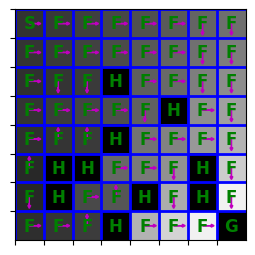

after iteration 25
iter    0 | diff: 0.00000 | V(start): 0.198 


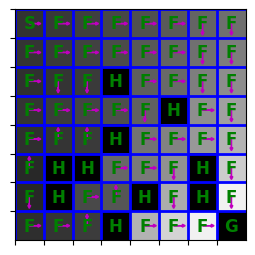

after iteration 26
iter    0 | diff: 0.00000 | V(start): 0.198 


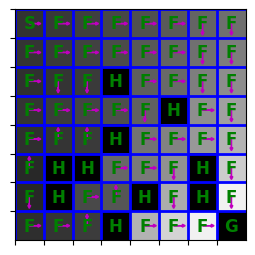

after iteration 27
iter    0 | diff: 0.00000 | V(start): 0.198 


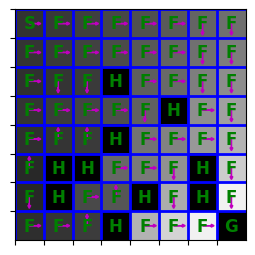

after iteration 28
iter    0 | diff: 0.00000 | V(start): 0.198 


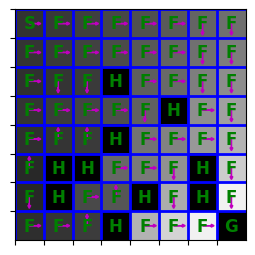

after iteration 29
iter    0 | diff: 0.00000 | V(start): 0.198 


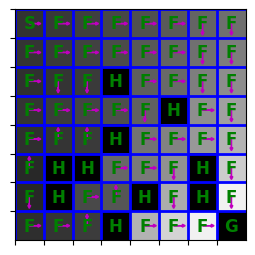

In [47]:
from IPython.display import clear_output 
from time import sleep 

mdp = FrozenLakeEnv(map_name='8x8', slip_chance=0.1) 
state_values = {s: 0 for s in mdp.get_all_states()} 

for i in range(30): 
    #clear_output(True) 
    print("after iteration %i" % i) 
    state_values = value_iteration(mdp, state_values, num_iter=1)     
    draw_policy(mdp, state_values) 
    sleep(0.5)

In [48]:
print("Final state-values = ", state_values)

Final state-values =  {(0, 0): 0.1981684335616138, (0, 1): 0.22234453053304482, (0, 2): 0.2493938602121421, (0, 3): 0.2796305131378171, (0, 4): 0.31337222528234676, (0, 5): 0.3501900594269184, (0, 6): 0.39118770221758725, (0, 7): 0.43410192748245174, (1, 0): 0.20337356473110288, (1, 1): 0.22955578700659218, (1, 2): 0.25934276277310475, (1, 3): 0.29368086707410623, (1, 4): 0.34703394392239617, (1, 5): 0.39043262590567285, (1, 6): 0.439376003543815, (1, 7): 0.49007888169577374, (2, 0): 0.1892404212232484, (2, 1): 0.2107255730552412, (2, 2): 0.22752308948428376, (2, 3): 0, (2, 4): 0.3707059345648658, (2, 5): 0.4173224538683299, (2, 6): 0.4935222045991991, (2, 7): 0.5533992739082584, (3, 0): 0.20890903992425222, (3, 1): 0.23700150977169715, (3, 2): 0.2691857278445299, (3, 3): 0.30704795132426943, (3, 4): 0.37907154485655836, (3, 5): 0, (3, 6): 0.55535768747389, (3, 7): 0.6250466757738938, (4, 0): 0.18715573999139046, (4, 1): 0.21063157166003943, (4, 2): 0.22751885941080063, (4, 3): 0, (4, 

Step 03: Massive testing

In [55]:
# function to compute the mean reward 
def compute_mean_reward(environment, state_values, min_rew, max_rew):
    total_rewards = []

    # check 1000 iterations
    for i in range(1000):
        s = environment.reset()
        rewards = []

        # check 100 episodes
        for t in range(100):
            s, r, done, _ = environment.step(get_optimal_action(environment, state_values, s, gamma))
            rewards.append(r)
            if done:
                break

        total_rewards.append(np.sum(rewards))

    print("Average reward = ", np.mean(total_rewards))
    assert(min_rew <= np.mean(total_rewards) <= max_rew)
    print("Well done!")

Case 1: probability of 0% to mistake in 4x4 environment

In [56]:
# initialization of environment with slip chance of 0%
mdp_env = FrozenLakeEnv(slip_chance = 0)

# compute state-values using Value-iteration algorithm
state_values = value_iteration(mdp_env)

# compute mean reward 
compute_mean_reward(mdp_env, state_values, min_rew = 1.0, max_rew = 1.0)

iter    0 | diff: 1.00000 | V(start): 0.000 
iter    1 | diff: 0.90000 | V(start): 0.000 
iter    2 | diff: 0.81000 | V(start): 0.000 
iter    3 | diff: 0.72900 | V(start): 0.000 
iter    4 | diff: 0.65610 | V(start): 0.000 
iter    5 | diff: 0.59049 | V(start): 0.590 
iter    6 | diff: 0.00000 | V(start): 0.590 
Average reward =  1.0
Well done!


Case 2: probability of 10% to mistake in 4x4 environment

In [57]:
# initialization of agent with 10% of slip probability
mdp_env2 = FrozenLakeEnv(slip_chance = 0.1)

# calculate state-values
state_values = value_iteration(mdp_env2)

# compute mean reward
compute_mean_reward(mdp_env2, state_values, min_rew = 0.8, max_rew = 0.95)

iter    0 | diff: 0.90000 | V(start): 0.000 
iter    1 | diff: 0.72900 | V(start): 0.000 
iter    2 | diff: 0.62330 | V(start): 0.000 
iter    3 | diff: 0.50487 | V(start): 0.000 
iter    4 | diff: 0.40894 | V(start): 0.000 
iter    5 | diff: 0.34868 | V(start): 0.349 
iter    6 | diff: 0.06529 | V(start): 0.410 
iter    7 | diff: 0.05832 | V(start): 0.468 
iter    8 | diff: 0.01139 | V(start): 0.480 
iter    9 | diff: 0.00764 | V(start): 0.487 
iter   10 | diff: 0.00164 | V(start): 0.489 
iter   11 | diff: 0.00094 | V(start): 0.490 
iter   12 | diff: 0.00022 | V(start): 0.490 
iter   13 | diff: 0.00011 | V(start): 0.490 
iter   14 | diff: 0.00003 | V(start): 0.490 
iter   15 | diff: 0.00001 | V(start): 0.490 
iter   16 | diff: 0.00000 | V(start): 0.490 
Average reward =  0.89
Well done!


Case 3: probability of 25% to mistake in 4x4 environment

In [58]:
# intialization of agent with 25% of slip probability
mdp_env3 = FrozenLakeEnv(slip_chance = 0.25)

# compute state-values
state_values = value_iteration(mdp_env3)

# compute mean reward
compute_mean_reward(mdp_env3, state_values, min_rew = 0.6, max_rew = 0.7)

iter    0 | diff: 0.75000 | V(start): 0.000 
iter    1 | diff: 0.50625 | V(start): 0.000 
iter    2 | diff: 0.39867 | V(start): 0.000 
iter    3 | diff: 0.26910 | V(start): 0.000 
iter    4 | diff: 0.18164 | V(start): 0.000 
iter    5 | diff: 0.14013 | V(start): 0.140 
iter    6 | diff: 0.07028 | V(start): 0.199 
iter    7 | diff: 0.06030 | V(start): 0.260 
iter    8 | diff: 0.02594 | V(start): 0.285 
iter    9 | diff: 0.01918 | V(start): 0.305 
iter   10 | diff: 0.00858 | V(start): 0.313 
iter   11 | diff: 0.00560 | V(start): 0.319 
iter   12 | diff: 0.00260 | V(start): 0.321 
iter   13 | diff: 0.00159 | V(start): 0.323 
iter   14 | diff: 0.00076 | V(start): 0.324 
iter   15 | diff: 0.00045 | V(start): 0.324 
iter   16 | diff: 0.00022 | V(start): 0.324 
iter   17 | diff: 0.00012 | V(start): 0.325 
iter   18 | diff: 0.00006 | V(start): 0.325 
iter   19 | diff: 0.00003 | V(start): 0.325 
iter   20 | diff: 0.00002 | V(start): 0.325 
iter   21 | diff: 0.00001 | V(start): 0.325 
Average re

Case 4: probability of 20% to mistake in 8 x 8 environment

In [61]:
# initialize agent with 20% of slip probability in 8x8 environment
mdp_env4 = FrozenLakeEnv(slip_chance = 0.2, map_name = "8x8")

# calculate state-values 
state_values = value_iteration(mdp_env4)

# compute mean reward
compute_mean_reward(mdp_env4, state_values, min_rew = 0.6, max_rew = 0.8)


iter    0 | diff: 0.80000 | V(start): 0.000 
iter    1 | diff: 0.57600 | V(start): 0.000 
iter    2 | diff: 0.41472 | V(start): 0.000 
iter    3 | diff: 0.29860 | V(start): 0.000 
iter    4 | diff: 0.24186 | V(start): 0.000 
iter    5 | diff: 0.19349 | V(start): 0.000 
iter    6 | diff: 0.15325 | V(start): 0.000 
iter    7 | diff: 0.12288 | V(start): 0.000 
iter    8 | diff: 0.09930 | V(start): 0.000 
iter    9 | diff: 0.08037 | V(start): 0.000 
iter   10 | diff: 0.06426 | V(start): 0.000 
iter   11 | diff: 0.05129 | V(start): 0.000 
iter   12 | diff: 0.04330 | V(start): 0.000 
iter   13 | diff: 0.03802 | V(start): 0.033 
iter   14 | diff: 0.03332 | V(start): 0.058 
iter   15 | diff: 0.02910 | V(start): 0.087 
iter   16 | diff: 0.01855 | V(start): 0.106 
iter   17 | diff: 0.01403 | V(start): 0.120 
iter   18 | diff: 0.00810 | V(start): 0.128 
iter   19 | diff: 0.00555 | V(start): 0.133 
iter   20 | diff: 0.00321 | V(start): 0.137 
iter   21 | diff: 0.00247 | V(start): 0.138 
iter   22 